<a href="https://colab.research.google.com/github/Maks12435/ML-projects/blob/main/Fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1)
])


model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


predicted_probs = model.predict(x_test)
predicted_classes = np.argmax(predicted_probs, axis=1)

df_results = pd.DataFrame({
    'Actual Class': y_test,
    'Predicted Class': predicted_classes,
    'Prediction Probability': np.max(predicted_probs, axis=1)
})

print(df_results.head(10))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 56ms/step - accuracy: 0.4792 - loss: 1.4039 - val_accuracy: 0.6657 - val_loss: 0.9819
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 52ms/step - accuracy: 0.6803 - loss: 0.8780 - val_accuracy: 0.6880 - val_loss: 0.8963
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.7209 - loss: 0.7625 - val_accuracy: 0.7389 - val_loss: 0.7619
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.7420 - loss: 0.7079 - val_accuracy: 0.7568 - val_loss: 0.6616
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.7598 - loss: 0.6634 - val_accuracy: 0.7375 - val_loss: 0.7304
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
   Actual Class  Predicted Class  Prediction Probability
0             9                9                0.571340
1             2                2                0.809878
2             1                1                0.999998
3             1                1                0.999986
4            

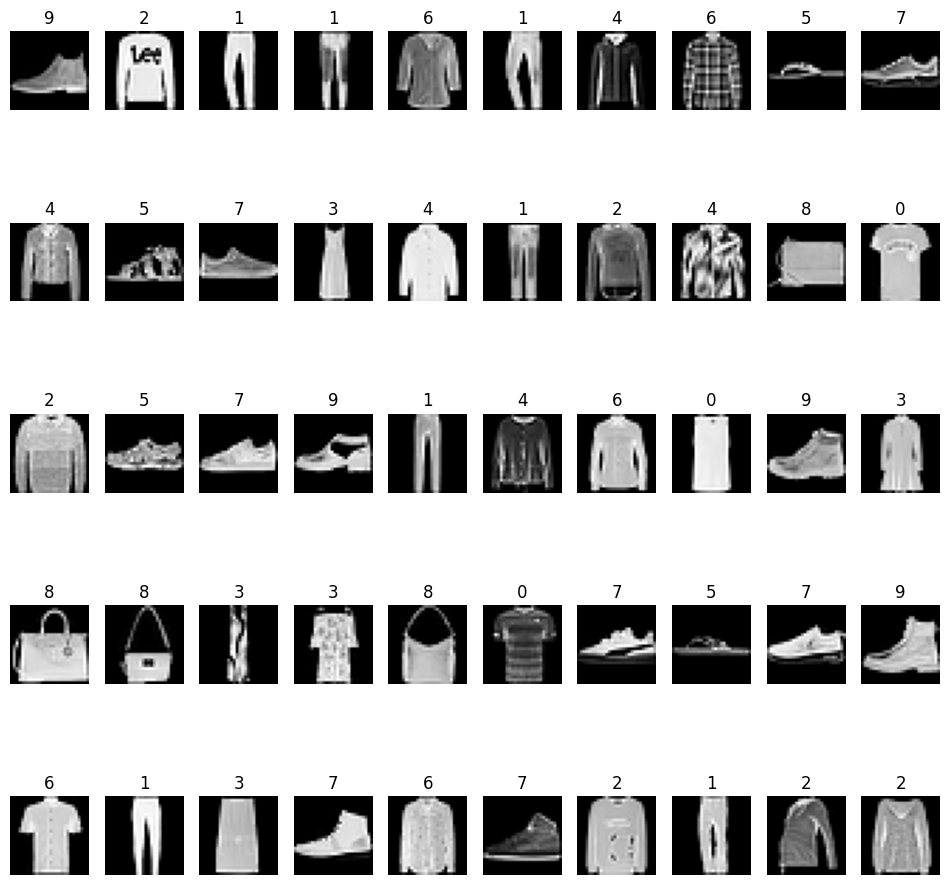

In [ ]:
fig, axe = plt.subplots(5, 10, figsize=(12, 12))
axe = axe.flatten()

for i in range(50):
  axe[i].imshow(x_test[i], cmap='gray')
  axe[i].set_title(y_test[i])
  axe[i].axis('off')
plt.show()

In [ ]:
model.predict(x_train[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[4.5865009e-04, 2.7726759e-04, 5.1122898e-04, 1.4245473e-03,
        5.8042812e-03, 2.5591707e-01, 4.9110409e-03, 2.3512220e-01,
        5.9366836e-03, 4.8963705e-01]], dtype=float32)

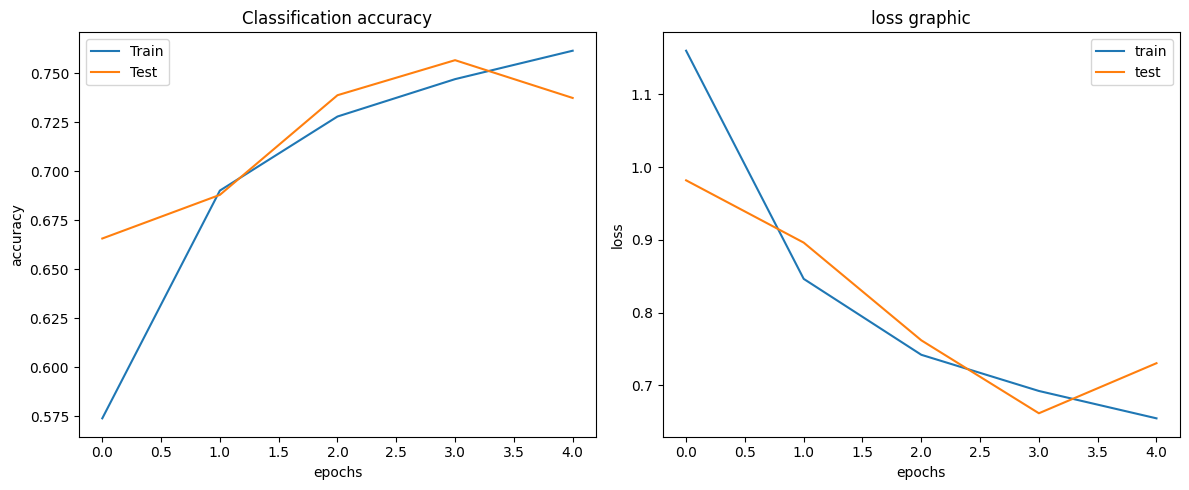

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Classification accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss graphic')

plt.tight_layout()
plt.show()

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)